# Phase 2: Data Generation & Synthesis

## Purpose:
To generate a realistic synthetic dataset for training the placement prediction model.

## Dataset Features:
- CGPA
- Backlogs
- Internship_Count
- Coding_Rating
- Aptitude_Score
- Target_Class

## Goal:
Create correlated data that reflects real placement patterns.


In [2]:
import pandas as pd
import numpy as np
import random


In [4]:
NUM_STUDENTS = 1000   

In [6]:
def generate_cgpa():
    return round(np.random.uniform(5.0, 9.8), 2)

def generate_backlogs():
    return np.random.choice([0, 1], p=[0.85, 0.15])  # most students no backlogs

def generate_internships():
    return np.random.choice([0,1,2,3], p=[0.35,0.35,0.2,0.1])

def generate_coding_rating():
    return int(np.random.uniform(800, 2200))

def generate_aptitude():
    return int(np.random.uniform(35, 100))


In [8]:
def assign_target_class(cgpa, backlogs, internships, coding, aptitude):
    
    # Tier 1 logic
    if (cgpa >= 8.5 and coding >= 1700 and internships >= 1 and aptitude >= 75 and backlogs == 0):
        return "Tier_1"
    
    # Tier 2 logic
    elif (cgpa >= 7.5 and coding >= 1400 and aptitude >= 65 and backlogs == 0):
        return "Tier_2"
    
    # Mass recruiter logic
    elif (cgpa >= 6.5 and aptitude >= 55):
        return "Mass_Recruiter"
    
    # Unplaced logic
    else:
        return "Unplaced"


In [14]:
data = []

for _ in range(NUM_STUDENTS):
    cgpa = generate_cgpa()
    backlogs = generate_backlogs()
    internships = generate_internships()
    coding = generate_coding_rating()
    aptitude = generate_aptitude()
    
    target = assign_target_class(cgpa, backlogs, internships, coding, aptitude)
    
    data.append([
        cgpa,
        backlogs,
        internships,
        coding,
        aptitude,
        target
    ])

columns = ["CGPA", "Backlogs", "Internship_Count", "Coding_Rating", "Aptitude_Score", "Target_Class"]
df = pd.DataFrame(data, columns=columns)

df.head()


,CGPA,Backlogs,Internship_Count,Coding_Rating,Aptitude_Score,Target_Class
0,9.45,0,0,1880,38,Unplaced
1,9.29,0,2,1154,87,Mass_Recruiter
2,5.65,0,1,1812,92,Unplaced
3,6.51,0,3,1967,43,Unplaced
4,6.85,0,0,1364,60,Mass_Recruiter


In [16]:
df["Target_Class"].value_counts()


Target_Class
Unplaced          510
Mass_Recruiter    363
Tier_2            107
Tier_1             20
Name: count, dtype: int64

In [18]:
df.describe()


,CGPA,Backlogs,Internship_Count,Coding_Rating,Aptitude_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.435390,0.158000,1.036000,1483.386000,67.332000
std,1.370765,0.364924,0.974502,403.672869,18.838755
min,5.010000,0.000000,0.000000,802.000000,35.000000
25%,6.280000,0.000000,0.000000,1143.750000,51.000000
50%,7.490000,0.000000,1.000000,1479.500000,68.000000
75%,8.610000,0.000000,2.000000,1832.000000,85.000000
max,9.800000,1.000000,3.000000,2198.000000,99.000000


In [20]:
corr = df[["CGPA","Internship_Count","Coding_Rating","Aptitude_Score"]].corr()
corr

,CGPA,Internship_Count,Coding_Rating,Aptitude_Score
CGPA,1.000000,0.011612,-0.034307,-0.010962
Internship_Count,0.011612,1.000000,-0.045352,0.009272
Coding_Rating,-0.034307,-0.045352,1.000000,-0.015976
Aptitude_Score,-0.010962,0.009272,-0.015976,1.000000


In [22]:
df.to_csv("data/students_dataset.csv", index=False)
print("Dataset saved as data/students_dataset.csv")

Dataset saved as data/students_dataset.csv


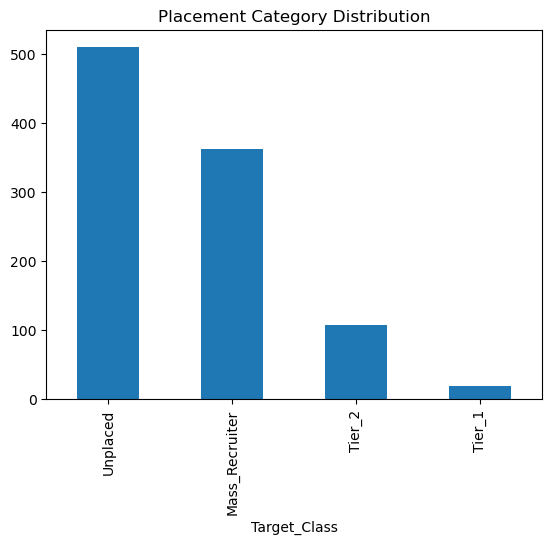

In [24]:
import matplotlib.pyplot as plt

df["Target_Class"].value_counts().plot(kind="bar")
plt.title("Placement Category Distribution")
plt.show()
